In [1]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

! python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()



import tweepy
import numpy as np
import pandas as pd
import os
import re
import time
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.svm import SVC
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('fivethirtyeight')


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
file = '/content/drive/MyDrive/tweet_data.csv'

In [5]:
colnames = ['target', 'id', 'date','flag','user','text']

In [6]:
# originalDataDF = pd.read_csv(file,names=colnames,delimiter=',',engine='python',nrows=None,encoding='latin-1',header=None)

originalDataDF = pd.read_csv('data/tweet_data.csv', names=colnames, delimiter=',' ,engine='python', nrows=None, encoding='latin-1', header=None)

In [7]:
originalDataDF.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
# def datasplitfortraining(l1=[],l2=[],m=0):
#     k = 0
#     for i in range(len(requiredTweetData)):
#         if(k==5000):
#             break
#         if requiredTweetData['target'][i] == m:
#             l1.append(requiredTweetData['target'][i])
#             l2.append(requiredTweetData['text'][i])
#             k+=1
#     newmodifieddf = pd.DataFrame({'target':l1,'text':l2})
#     return newmodifieddf



# d1 = datasplitfortraining(m=4)
# d2 = datasplitfortraining(m=2)
# d3 = datasplitfortraining(m=0)

In [9]:
def handling_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' EMO_POS ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', text)
    
    return text

In [10]:
# cleaning the text

# removing tagged username '@'
def cleaningText(text):
    text = text.strip('\'"?!,.():;') # removing punctuation
    text = re.sub(r'(.)\1+', r'\1\1', text) # convert more than 2 letter repetitions to 2 letter #fooood -> food
    text = re.sub(r'(-|\')','',text) # removing additional -& '
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removing @usernames
    text = re.sub(r'#','',text) #removing '#' symbols
    text = re.sub(r'RT[\s]+','',text) #removes RT(Re-Tweet) string 
    text = re.sub(r'https?:\/\/\S+','',text) #removing the hyperlink
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', text) #removing urls
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    text = handling_emojis(text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.lower() #make the text to lowercase
    return text


In [11]:
originalDataDF['text'] = originalDataDF['text'].apply(cleaningText)
originalDataDF['text'][0]

'aww, thats a bummer. you shoulda got david carr of third day to do it. emo_pos '

In [12]:
contractionWords = {
"aren’t":"are not","can’t":"can not","couldn’t":"could not ","didn’t":"did not","doesn’t":"does not","don’t":"do not","hadn’t":"had not","hasn’t":"has not ","haven’t":"have not",
"I’m":"I am","I’ve":"I have","isn’t":"is not","let’s":"let us","mightn’t":"might not","mustn’t":"must not","shan’t":"shall not","shouldn’t":"should not","that’s":" that is","he’ll":" he will",
"I’ll":"I will","she’ll":"she will","she’s":"she is","there’s":"there is","they’ll":" they will","they’re":"they are","they’ve":"they have","we’re":"we are","we’ve":"we have","weren’t":"were not",
"what’ll":"what will","what’re":"what are","what’ve":"what have","where’s":"where is","who’d":"who would","who’ll":"who will","who’re":"who are","who’s":"who is","who’ve":"who have","won’t":"will not",
"wouldn’t":"would not","you’d":"you would","you’re":"you are","you’ve":"you have","it’s":"it is","wasn't":"was not"
}

In [13]:
# negation handling
def negationHandling(text):
    words = text.split()
    temp = [contractionWords[word] if word in contractionWords else word for word in words]
    temp = " ".join(temp)
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(negationHandling)

In [14]:
word_set = []
def wordTokenize(text):
    tokens = word_tokenize(text)
    return tokens
originalDataDF['text'] = originalDataDF['text'].apply(wordTokenize)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'a',
 'bummer',
 '.',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it',
 '.',
 'emo_pos']

In [15]:
stop_words = stopwords.words('english')
def removeStopWords(tokens):
    temp = [word for word in tokens if word not in stop_words]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeStopWords)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'bummer',
 '.',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 '.',
 'emo_pos']

In [16]:
def removeUnnecessaryChars(tokens):
    temp = [word for word in tokens if word.isalpha()]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeUnnecessaryChars)
originalDataDF['text'][0]

['aww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [17]:
lemma = WordNetLemmatizer()
def lemmatizeTweets(wordList):
    temp = []
    for word in wordList:
        _word = lemma.lemmatize(word)
        temp.append(_word)
    return ' '.join(temp)
originalDataDF['text'] = originalDataDF['text'].apply(lemmatizeTweets)


In [18]:
def datasplitfortraining(l1=[],l2=[],m=0):
    k = 0
    for i in range(len(originalDataDF)):
        if(k==50000):
            break
        if originalDataDF['target'][i] == m:
            l1.append(originalDataDF['target'][i])
            l2.append(originalDataDF['text'][i])
            k+=1
    newmodifieddf = pd.DataFrame({'target':l1,'text':l2})
    return newmodifieddf



d1 = datasplitfortraining(m=4)
d2 = datasplitfortraining(m=2)
d3 = datasplitfortraining(m=0)

In [19]:
# temp_pos = d3.loc[d3['target'] == 0]
# temp_neg = d3.loc[d3['target'] == 4]
d3

,target,text
0,4,love u guy r best
1,4,im meeting one besties tonight cant wait girl ...
2,4,thanks twitter add sunisa got meet hin show dc...
3,4,sick really cheap hurt much eat real food plus...
4,4,effect everyone
...,...,...
99995,0,insomnia prob slept hr woke nd couldnt go back...
99996,0,mintues late meeting starting howd know going ...
99997,0,super excited tweeting event happening way fol...
99998,0,want another day much sht today got quot quot ...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

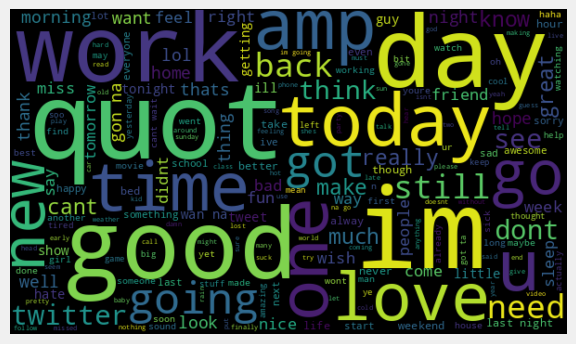

In [21]:
allwords = ''.join([t for t in d3['text']])
wordCloud = WordCloud(width=600,height=350,random_state=59,max_font_size=120).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [22]:
vectorizer = TfidfVectorizer(min_df = 5,max_df=0.8,sublinear_tf = True,use_idf = True)

In [23]:
train_vectors = vectorizer.fit_transform(d3['text'])

In [24]:
print(train_vectors.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
for i in train_vectors.toarray():
    for j in i:
        if j!=0:
            pass
            # print(j)

In [28]:
X = train_vectors.toarray()
y = np.where(d3['target'] == 0 , -1 , 1)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [35]:
X_train.shape

(80000, 9094)

In [36]:
y_train.shape

(80000,)

In [40]:
svm_model = SVC(kernel='linear')



In [41]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
preds = svm_model.predict(X_train)

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as peffects

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import explained_variance_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [44]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    PARAMS:
        cm: the confusion matrix
        classes: list of unique class labels
        normalize: boolean flag whether to normalize values
        title: figure title
        cmap: colormap scheme
    """
    # View percentages
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_mtx', bbox_inches="tight")


In [45]:
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    ''' 
    Generate a figure that plots a colormap of a matrix
    PARAMS:
        mtx: matrix of values
        xnames: list of x tick names
        ynames: list of the y tick names
        cbarlabel: label for the color bar
    RETURNS:
        fig, ax: the corresponding handles for the figure and axis
    '''
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    
    # create the figure and plot the correlation matrix
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(mtx, cmap='summer')
    if not cbarlabel == "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # Specify the row and column ticks and labels for the figure
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, 
             ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            text = ax.text(j, i, "%s = %d" % (lbl[i,j], mtx[i, j]),
                           ha="center", va="center", color="k")
            #text.set_path_effects([peffects.withStroke(linewidth=2, 
            #foreground='w')])

    return fig, ax


In [46]:
def ks_roc_prc_plot(targets, scores, FIGWIDTH=10, FIGHEIGHT=4, FONTSIZE=14):
    ''' 
    Generate a figure that plots the ROC and PR Curves and the distributions 
    of the TPR and FPR over a set of thresholds. ROC plots the false alarm rate 
    versus the hit rate. The precision-recall curve (PRC) displays recall vs 
    precision
    PARAMS:
        targets: list of true target labels
        scores: list of prediction scores
    RETURNS:
        roc_results: dict of ROC results: {'tpr', 'fpr', 'thresholds', 'AUC'}
        prc_results: dict of PRC results: {'precision', 'recall', 
                                           'thresholds', 'AUC'}
        fig, axs: corresponding handles for the figure and axis
    '''
    # Compute ROC
    fpr, tpr, thresholds = roc_curve(targets, scores)
    auc_roc = auc(fpr, tpr)
    
    # Compute precision-recall AUC
    precision, recall, thresholds_prc = precision_recall_curve(targets, scores)
    auc_prc = auc(recall, precision)
    
    roc_results = {'tpr':tpr, 'fpr':fpr, 'thresholds':thresholds, 'auc':auc_roc}
    prc_results = {'precision':precision, 'recall':recall, 'thresholds':thresholds_prc, 'auc':auc_prc}
    #thresholds = {'roc_thres':thresholds, 'prc_thres':thresholds_prc}
    #auc_results = {'roc_auc':auc_roc, 'prc_auc':auc_prc}
    
    # Compute positve fraction
    pos = np.where(targets)[0]
    npos = len(pos)
    pos_frac = npos / targets.shape[0]

    # Generate KS plot
    fig, ax = plt.subplots(1, 3, figsize=(FIGWIDTH,FIGHEIGHT))
    axs = ax.ravel()
    
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].invert_xaxis()
    ax[0].set(xlabel='threshold', ylabel='fraction')
    ax[0].legend(['TPR', 'FPR', 'K-S Distance'], fontsize=FONTSIZE)
    
    # Generate ROC Curve plot
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0,1], [0,1], 'r--')
    ax[1].set(xlabel='FPR', ylabel='TPR')
    ax[1].set_aspect('equal', 'box')
    auc_text = ax[1].text(.05, .95, "AUC = %.4f" % auc_roc, 
                          color="k", fontsize=FONTSIZE)
    print("ROC AUC:", auc_roc)
    
    # Generate precision-recall Curve plot
    ax[2].plot(recall, precision, color='b')
    ax[2].set(xlabel='Recall', ylabel='Precision')
    ax[2].set_aspect('equal', 'box')
    auc_prc_text = plt.text(.2, .95, "PR AUC = %.4f" % auc_prc, 
                            color="k", fontsize=FONTSIZE)
    pos_frac_text = plt.text(.2, .85, "%.2f %% pos" % (pos_frac * 100), 
                             color="k", fontsize=FONTSIZE)
    print("PRC AUC:", auc_prc)

    return roc_results, prc_results, fig, axs


In [47]:
confusion_matrix = confusion_matrix(y_train,preds)

In [50]:
targetnames = ['positive', 'negative']

(<Figure size 400x400 with 2 Axes>,
 <AxesSubplot: xlabel='Predicted Labels', ylabel='Actual Labels'>)

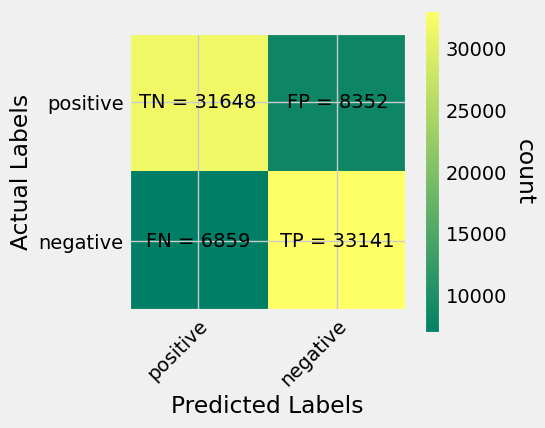

In [51]:
confusion_mtx_colormap(confusion_matrix,targetnames,targetnames,'count')

ROC AUC: 0.885330444375
PRC AUC: 0.8824334481312307


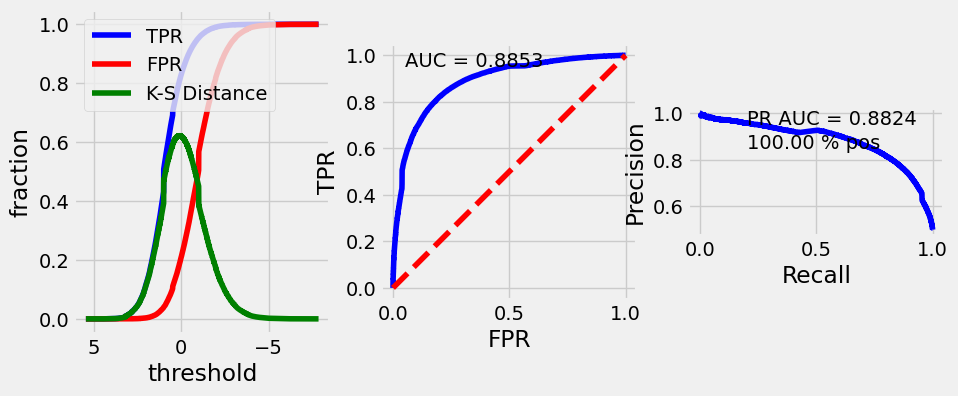

In [56]:
probas = svm_model.decision_function(X_train) #TODO


roc_prc_results = ks_roc_prc_plot(y_train,probas)

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
import time as timelib

In [69]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"

In [72]:
review_vector = vectorizer.transform([review]) # vectorizing
print(svm_model.predict(review_vector.toarray()))

[1]


In [73]:
review = "Do not purchase this product. My cell phone blast when I switched the charger"

In [74]:
review_vector = vectorizer.transform([review]) # vectorizing
print(svm_model.predict(review_vector.toarray()))

[-1]


In [75]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(svm_model, open('svm_model.sav', 'wb'))

In [ ]:
classifier_linear = SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, d3['target'])
t1 = time.time()
#prediction_linear = classifier_linear.predict(test_vectors)
#t2 = time.time()
time_linear_train = t1-t0
#time_linear_predict = t2-t1 

In [ ]:
temp_pos = d3.loc[d3['target'] == 0]
temp_neg = d3.loc[d3['target'] == 4]

In [ ]:
# pos_vectorss = vectorizer.fit_transform(temp_pos['text'])
# neg_vectorss = vectorizer.fit_transform(temp_neg['text'])

In [ ]:
# results
print("Training time: %fs;" % (time_linear_train))

In [ ]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"

In [ ]:
review = "This is predicted to be positive tweet"

In [ ]:
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

In [ ]:
review = "Do not purchase this product. My cell phone blast when I switched the charger"

In [ ]:
# importing some basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import random as rnd
import numpy as np

In [ ]:
temp_neg = d3.loc[d3['target'] == 0]
temp_pos = d3.loc[d3['target'] == 4]

In [ ]:
neg_vec = vectorizer.fit(temp_neg['text'])

In [ ]:
pos_vec = vectorizer.fit(temp_pos['text'])


In [ ]:
import numpy as np
class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
        



In [ ]:
svm =  SVM()
svm.fit(train_vectors.toarray(),d3['target'])

In [ ]:
for i in train_vectors.toarray():
    for j in i:
        if j!=0:
            pass
            # print(j)

In [ ]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"

In [ ]:
review2 = "Very good to know you positive"

In [ ]:
review_vector = vectorizer.transform([review])

In [ ]:
review_vector2 = vectorizer.transform([review2])

In [ ]:
svm.predict(review_vector2.toarray())

In [ ]:
svm.predict(review_vector2.toarray())

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [ ]:
X = train_vectors.toarray()
y = np.where(d3['target'] == 0 , -1 , 1)

clf = SVM()
clf.fit(X, y)

In [ ]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"

In [ ]:
review_vector = vectorizer.transform([review])

In [ ]:
for i in review_vector.toarray():
    for j in i:
        if j!=0:
            print(j)

In [ ]:
clf.predict(review_vector.toarray())

In [ ]:
review = "Do not purchase this product. My cell phone blast when I switched the charger"

In [ ]:
review_vector = vectorizer.transform([review])

In [ ]:
for i in review_vector.toarray():
    for j in i:
        if j!=0:
            print(j)

In [ ]:
for i in clf.predict(X):
    if i!=-1:
        print(i)

In [ ]:
from sklearn import datasets

In [ ]:
X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [ ]:
y = np.where(d3['target'] == 0 , -1 , 1)
y
y.shape

In [ ]:
X = train_vectors.toarray()
X.shape

In [ ]:
review = "Negativee not likw"

In [ ]:
review_vector = vectorizer.transform([review])

In [ ]:
svm.predict(review_vector.toarray())

In [ ]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]
    def transform_poly(self, X, Y=None):
      # Finding the Square of X1, X2
      X['x1^2'] = X['x1'] ** 2
      X['x2^2'] = X['x2'] ** 2
      # Finding the product of X1 and X2
      X['x1 * x2'] = X['x1'] * X['x2']
      # Converting dataset to numpy array
      X = X.to_numpy()
      if Y.size != 0:
        Y = Y.to_numpy()
        return X, Y
      else:
        return X

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        if(self.kernel == "poly"):
            print("SVM(kernel='poly')")
            X, Y = self.transform_poly(X, Y)
        else:
            X = X.to_numpy()
            Y = Y.to_numpy()
        
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
      if(self.kernel == "poly"):
        X = self.transform_poly(X, np.array([]))
      else:
        X.to_numpy()
      linear_prediction = np.dot(X, self.w[0]) + self.b
      return np.sign(linear_prediction)
        

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf = True,use_idf = True)

In [ ]:
train_vectors = vectorizer.fit_transform(d3['text'])

In [ ]:
X = pd.DataFrame(train_vectors.toarray())

In [ ]:
y = pd.DataFrame(d3['target'])

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

svm = SVM_Scratch(kernel="poly")

w, b, losses = svm.fit(X_train, y_train)

pred = svm.predict(X_test)

accuracy_score("Accuracy:",pred, y_test)